## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.
mouse_total = len(data_df['Mouse ID'].unique())
mouse_total


249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

duplicate_df

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
id_g989 = data_df.loc[data_df["Mouse ID"] == "g989", :]
id_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_df = data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
mouse_total_clean = len(clean_data_df['Mouse ID'].unique())
mouse_total_clean

249

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

regimen_stats_summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})

regimen_stats_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function



## Bar and Pie Charts

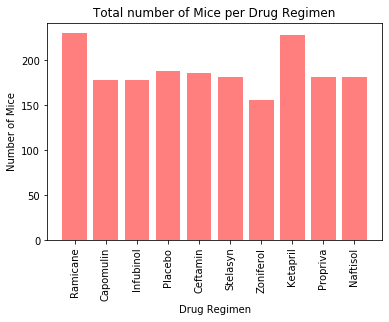

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar1_df = clean_data_df["Drug Regimen"].unique()
group = clean_data_df.groupby('Drug Regimen')
countMice = group['Mouse ID'].count()

#Set x_axis
x_axis = np.arange(len(bar1_df))

# plot bar chart
plt.bar(x_axis, countMice, color='r', alpha=0.5, align='center')
ticker_location = [value for value in x_axis]
plt.xticks(ticker_location, bar1_df, rotation='vertical')
plt.title('Total number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


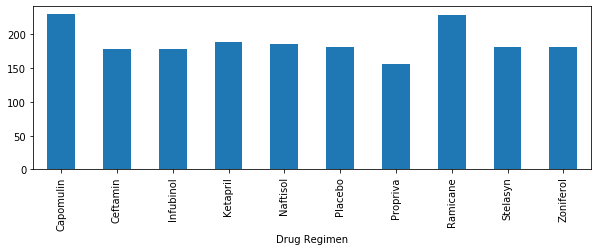

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_df = pd.DataFrame(clean_data_df.groupby(["Drug Regimen"]).count())
bar_df['Mouse ID']
bar_df['Mouse ID'].plot(kind="bar", figsize=(10,3))


([<matplotlib.patches.Wedge at 0x17987b38848>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Male'),
  Text(0.7925486753677614, 0.9010364016913006, 'Female')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.46232006063119413, 0.5256045676532586, '50.7%')])

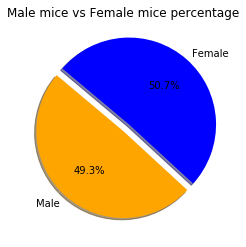

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data_df.groupby(['Sex']).count()
gender = gender['Drug Regimen']

# Set label for pie chart
labels = ['Male', 'Female']

#Set value for pie chart
size = gender

# Set colors
colors = ['orange', 'blue']

# Tell matplot to seperate the'Female' section from others
explode = (0, 0.1)

# Label pie chart title
plt.title('Male mice vs Female mice percentage')

# Plot pie chart
plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)


Text(0.5, 1.0, 'Male mice vs Female mice percentage')

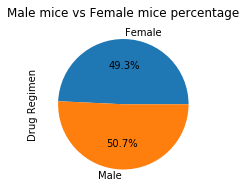

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_data_df.groupby(['Sex']).count()
gender = gender['Drug Regimen'].plot(kind="pie", figsize=(10,3), autopct='%1.1f%%')
plt.title('Male mice vs Female mice percentage')

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= clean_data_df.groupby('Mouse ID').max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(last_timepoint, clean_data_df, how='left', on=['Mouse ID', 'Timepoint'])
merge_df

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4,Placebo,Female,17,29,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0,Propriva,Female,12,26,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0,Ramicane,Male,11,16,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3,Infubinol,Female,24,25,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3,Naftisol,Female,13,29,65.741070,3


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
drugList = ["Capomulin", "Ramicane", "infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugList:
    druglist_merge_df = merge_df.loc[merge_df['Drug Regimen_x']== drug]
    druglist_merge_df = druglist_merge_df['Tumor Volume (mm3)_x']

    quartiles = druglist_merge_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumorsize is: {lowerq}")
    print(f"The upper quartile of tumorsize is: {upperq}")
    print(f"The interquartile range of tumorsize is: {iqr}")
    print(f"The the median of tumorsize is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    tumor_vol.append(druglist_merge_df)
    
    # Determine outliers using upper and lower bounds
mouse_vol = merge_df[['Mouse ID', 'Drug Regimen_y', 'Timepoint', 'Tumor Volume (mm3)_y']]
determine_outlier = mouse_vol.loc[(mouse_vol['Tumor Volume (mm3)_y'] <lower_bound) | (mouse_vol['Tumor Volume (mm3)_y'] > upper_bound)]
determine_outlier
 

The lower quartile of tumorsize is: 45.0
The upper quartile of tumorsize is: 46.74900552
The interquartile range of tumorsize is: 1.7490055199999972
The the median of tumorsize is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.
The lower quartile of tumorsize is: 45.0
The upper quartile of tumorsize is: 46.34383237
The interquartile range of tumorsize is: 1.3438323700000012
The the median of tumorsize is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.
The lower quartile of tumorsize is: nan
The upper quartile of tumorsize is: nan
The interquartile range of tumorsize is: nan
The the median of tumorsize is: nan 
Values below nan could be outliers.
Values above nan could be outliers.
The lower quartile of tumorsize is: 48.72207785
The upper quartile of tumorsize is: 64.29983003
The interquartile range of tumorsize is: 15.577752179999997
The the median of tumorsize is:

,Mouse ID,Drug Regimen_y,Timepoint,Tumor Volume (mm3)_y
97,k403,Ramicane,45,22.050126
175,s185,Capomulin,45,23.343598


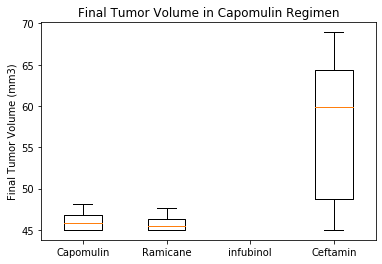

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels=drugList)
plt.show()

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
60,f966,Capomulin,Male,16,17,0,45.000000,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0


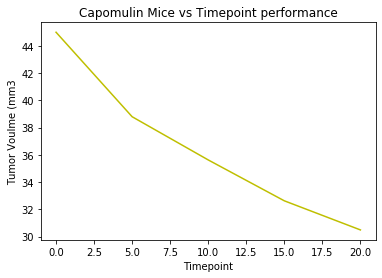

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capo_mouse = clean_data_df.loc[clean_data_df['Mouse ID']== "f966"]
plt.plot(Capo_mouse['Timepoint'], Capo_mouse['Tumor Volume (mm3)'], color='y')
plt.title('Capomulin Mice vs Timepoint performance')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Voulme (mm3')
Capo_mouse

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

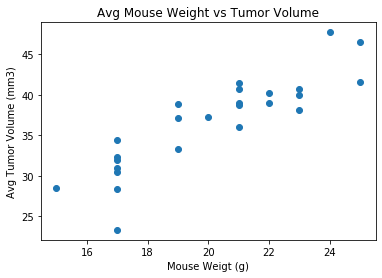

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capo_group = merge_df.loc[merge_df['Drug Regimen_y']== "Capomulin"]
capo_group_avg = Capo_group.groupby(['Mouse ID']).mean()
plt.scatter(capo_group_avg['Weight (g)_y'], capo_group_avg['Tumor Volume (mm3)_y'])
plt.title('Avg Mouse Weight vs Tumor Volume')
plt.xlabel('Mouse Weigt (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

## Correlation and Regression

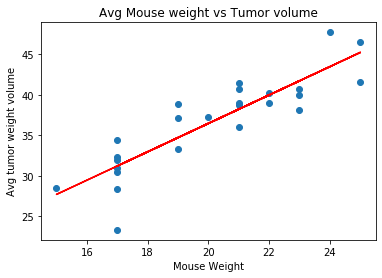

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation coefficient
#plt.scatter(capo_group_avg.iloc[:,6],capo_group_avg.iloc[:,7])
avg_weight = capo_group_avg['Weight (g)_y']
avg_tumor_vol = capo_group_avg['Tumor Volume (mm3)_y']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor_vol)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_weight,avg_tumor_vol)
plt.plot(avg_weight,regress_values,"r-")
plt.title('Avg Mouse weight vs Tumor volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg tumor weight volume')
plt.show()
